# CSI acquisition overhead for symmetric network with equi-sized coalitions

In [1]:
using PyPlot

INFO: Loading help data...


## Scenario definition

In [2]:
I = 16; Kc = 2
M = 8; N = 2
d = 1;
vs_kmh = [5, 30, 50, 90, 120]; # Speeds in [km/h]

fc = 2e9; # Carrier frequency [Hz]
Wc = 300e3; # Coherence bandwith in [Hz]

# This is given by IA feasibility
max_cluster_size = ifloor((M + N - d)/(Kc*d))

4

## Simulation stuff

In [3]:
vs = 1e3/3600*vs_kmh; # in [m/s]
λ = 300e6/fc; # Wavelength [m]
fds = vs/(λ*Wc); # normalized Doppler spreads
Tcs = ceil(1./(2fds))

5-element Array{Float64,1}:
 16200.0
  2700.0
  1620.0
   900.0
   675.0

## Phase 1 pre-log factor plot

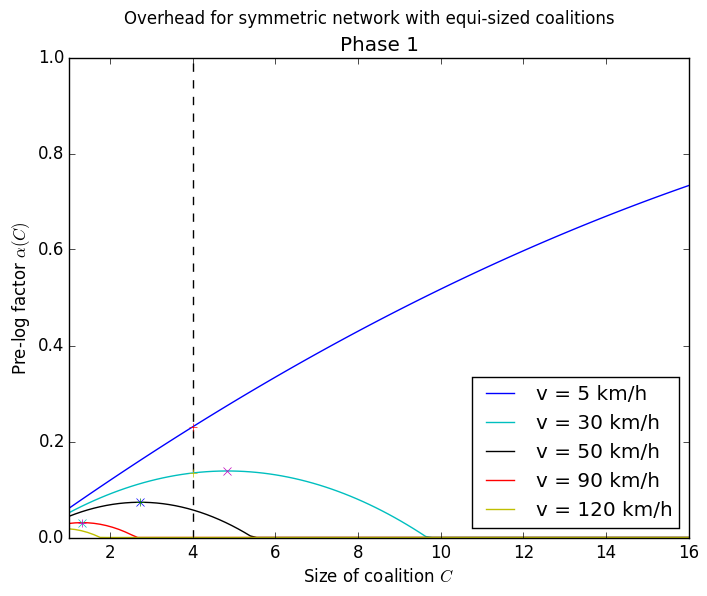

PyObject <matplotlib.text.Text object at 0x117108710>

In [4]:
α(C, Tc) = max(0, C/I - (1/Tc)*(C*(M + Kc*(N + d)) + C.^2*Kc*M))
Cs = linspace(1,I)
plot([max_cluster_size, max_cluster_size], [0., 1.], "--k")
for idx = 1:length(Tcs)
    Tc = Tcs[idx]; v_kmh = vs_kmh[idx]
    plot(Cs, α(Cs, Tc), label=string("v = ", v_kmh, " km/h"))
    
    # Optimal cluster size, in terms of phase 1 pre-log
    opt_size_ph1 = (Tc - I*(M + Kc*(N + d)))/(2*I*Kc*M)
    opt_alpha_ph1 = max(0, opt_size_ph1/I - (1/Tc)*(opt_size_ph1*(M + Kc*(N + d)) + opt_size_ph1^2*Kc*M))
    plot(opt_size_ph1, opt_alpha_ph1, "x")
    
    # Also taking into account IA feas
    opt_size_ph1_IA = min(opt_size_ph1, max_cluster_size)
    opt_alpha_ph1_IA = max(0, opt_size_ph1_IA/I - (1/Tc)*(opt_size_ph1_IA*(M + Kc*(N + d)) + opt_size_ph1_IA^2*Kc*M))
    plot(opt_size_ph1_IA, opt_alpha_ph1_IA, "+")
end
title("Phase 1")
xlabel(L"Size of coalition $C$")
ylabel(L"Pre-log factor $\alpha(C)$")
xlim(1, I)
ylim(0,1)
legend(loc="best")

suptitle("Overhead for symmetric network with equi-sized coalitions")

In [5]:
Tcs

5-element Array{Float64,1}:
 16200.0
  2700.0
  1620.0
   900.0
   675.0